# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Magic matplotlib command to have plots shown in the notebook
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called `chipo`.

In [10]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep= '\t')

### Step 4. Display the first 10 entries.

In [11]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a barplot of the top 5 items ordered

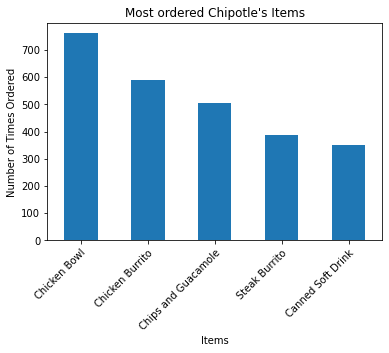

In [12]:
top_order = chipo.groupby('item_name')['quantity'].sum()

top5 = top_order.sort_values(ascending=False).head()

top5.plot(kind='bar')
plt.xlabel('Items')
plt.ylabel('Number of Times Ordered')
plt.title('Most ordered Chipotle\'s Items',)
plt.xticks(rotation= 45, ha='right', rotation_mode='anchor')
plt.show()


### Step 6. Create a scatter plot with the order price as a function of the number of items ordered
#### Hint: Price should be in the Y-axis and Items ordered in the X-axis

Text(0.5, 1.0, 'Price of order with respect to items ordered')

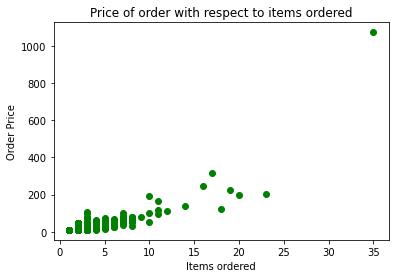

In [13]:
#drop symbol $ and change type of the price
chipo["item_price"]= chipo.item_price.str.slice(1).astype(float)

#creat a new column which the price
chipo['total_sale'] = chipo["item_price"]*chipo["quantity"]

#groupby by order id, and count the price per order, and quantity per order
price_per_order= chipo.groupby('order_id')['total_sale'].sum()
number_of_items_per_order = chipo.groupby('order_id')['quantity'].sum()

#creata scatter plot
plt.scatter(x = number_of_items_per_order, y = price_per_order, c = 'green')
plt.xlabel('Items ordered')
plt.ylabel('Order Price')
plt.title('Price of order with respect to items ordered')

Text(0.5, 1.0, 'Price of order with respect to items ordered')

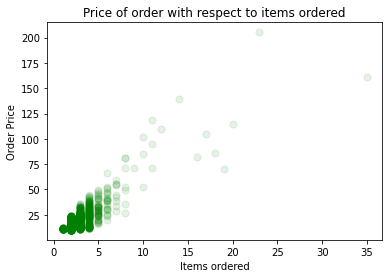

In [14]:
#according to the guideline, they sum item_price directly


#groupby by 'order_id', and count the price per order, and quantity per order
price_per_order= chipo.groupby('order_id')['item_price'].sum()
number_of_items_per_order = chipo.groupby('order_id')['quantity'].sum()

#create scatter plot
plt.scatter(x = number_of_items_per_order, y = price_per_order, s=50, alpha=0.1, c = 'green')
plt.xlabel('Items ordered')
plt.ylabel('Order Price')
plt.title('Price of order with respect to items ordered')


### BONUS: Create a question and a graph to answer your own question.

Create a scatter plot with the categorical variable `quantity` and it's relation to `item_price`.

<AxesSubplot:xlabel='quantity', ylabel='item_price'>

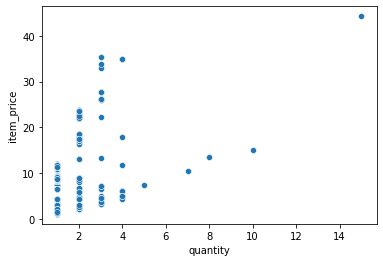

In [17]:
sns.scatterplot(y="item_price", x="quantity",  data=chipo)